In [2]:
from dlab import sorting_quality as sq
from sklearn.manifold import TSNE
from scipy.cluster.vq import kmeans2

import numpy as np
import seaborn as sns
import pandas as pd
import os, csv, time
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2 
sns.set_style("white")

In [550]:
directory = r'H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCG_047\2021-04-13_08-54-10\experiment1\recording1\continuous\Neuropix-PXI-100.0'
channels = 383
filename = 'continuous.dat'

## compute all metrics

In [551]:
channels2 = 'all'#[0,384]
print(channels2)
time_limits = None#[500.,600.]

t0 = time.time()
quality = sq.masked_cluster_quality(directory,time_limits)
print('PCA quality took '+str(time.time()-t0)+' sec');t0 = time.time()
isiV = sq.isiViolations(directory,time_limits)
print('ISI quality took '+str(time.time()-t0)+' sec');t0 = time.time();
SN = sq.cluster_signalToNoise(directory,filename,channels=383)
print('SN quality took '+str(time.time()-t0)+' sec');t0 = time.time()

cluster_groups = sq.read_cluster_groups_CSV(directory)  
print(cluster_groups[2])

print(isiV[0])

all
building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 444
cluster 0: # spikes:1451  iso. distance:1.8167279561261334  contamination:0.9869055823569952  1/444
cluster 1: # spikes:224  iso. distance:8.32871949496698  contamination:0.0580357142857143  2/444
cluster 2: # spikes:49  iso. distance:11.84563411464632  contamination:0.0  3/444
cluster 3: # spikes:1504  iso. distance:2.4661257836711123  contamination:0.9813829787234043  4/444
cluster 4: # spikes:1780  iso. distance:2.5312477583438953  contamination:0.9224719101123595  5/444
cluster 5: # spikes:917  iso. distance:2.1048777231681863  contamination:0.990185387131952  6/444
cluster 6: # spikes:1555  iso. distance:2.9403418692067964  contamination:0.8244372990353698  7/444
cluster 7: # spikes:27284  iso. distance:0.0  contamination:nan  8/444
cluster 8: # spikes:2104  iso. distance:2.277231998919307  contamination:0.997148288973384  9/444
cluster 9: # spikes:1947  iso. distance:2.36

cluster 90: # spikes:9617  iso. distance:5.791589500956628  contamination:0.14547156077778933  83/444
cluster 91: # spikes:51089  iso. distance:6.750204960300196  contamination:0.07518252461390906  84/444
cluster 92: # spikes:14791  iso. distance:3.1814698529717136  contamination:0.8593739436143601  85/444
cluster 93: # spikes:29646  iso. distance:3.9518718449457833  contamination:0.6123929029211361  86/444
cluster 95: # spikes:1760  iso. distance:5.419949294913809  contamination:0.19431818181818183  87/444
cluster 96: # spikes:1999  iso. distance:7.1180686830884214  contamination:0.047023511755877934  88/444
cluster 97: # spikes:4996  iso. distance:4.1858730555485675  contamination:0.4681745396317054  89/444
cluster 98: # spikes:74306  iso. distance:4.525236102863029  contamination:0.3636314698678438  90/444
cluster 99: # spikes:11314  iso. distance:4.015125861562316  contamination:0.5890931589181545  91/444
cluster 100: # spikes:18581  iso. distance:4.544718637607988  contamination:0

cluster 180: # spikes:39153  iso. distance:2.384024525046288  contamination:0.9934104666309095  163/444
cluster 183: # spikes:3683  iso. distance:8.48908503813739  contamination:0.024436600597339098  164/444
cluster 184: # spikes:18254  iso. distance:3.1565592168937746  contamination:0.8995836528979949  165/444
cluster 185: # spikes:5726  iso. distance:12.772597762395078  contamination:0.017289556409360807  166/444
cluster 186: # spikes:1337  iso. distance:3.579475046837606  contamination:0.6821241585639491  167/444
cluster 187: # spikes:164  iso. distance:5.916233036105928  contamination:0.09146341463414631  168/444
cluster 188: # spikes:9091  iso. distance:4.317899068461055  contamination:0.4028159718402816  169/444
cluster 189: # spikes:2174  iso. distance:10.5371782754066  contamination:0.006899724011039554  170/444
cluster 190: # spikes:17358  iso. distance:3.266343166412263  contamination:0.8316050236202328  171/444
cluster 191: # spikes:5339  iso. distance:2.9590875919381316  co

cluster 263: # spikes:19108  iso. distance:3.8002050305674064  contamination:0.6065522294326984  242/444
cluster 264: # spikes:1112  iso. distance:5.9077025427258265  contamination:0.08723021582733814  243/444
cluster 265: # spikes:32323  iso. distance:3.042540398483435  contamination:0.9232435108127339  244/444
cluster 266: # spikes:46742  iso. distance:2.7357400500374074  contamination:0.962859954644645  245/444
cluster 267: # spikes:60782  iso. distance:3.3971652183000467  contamination:0.8160968707841137  246/444
cluster 268: # spikes:2608  iso. distance:5.092995856732279  contamination:0.2304447852760736  247/444
cluster 269: # spikes:16371  iso. distance:2.59634134602137  contamination:0.9712296133406634  248/444
cluster 270: # spikes:14361  iso. distance:2.7332599245422715  contamination:0.9699881623842351  249/444
cluster 271: # spikes:2426  iso. distance:3.36247196659654  contamination:0.6924979389942292  250/444
cluster 272: # spikes:17123  iso. distance:1.4361109966664378  c

cluster 347: # spikes:411  iso. distance:8.748643690035813  contamination:0.051094890510948954  323/444
cluster 348: # spikes:14448  iso. distance:2.2326842760000534  contamination:0.9804125138427464  324/444
cluster 349: # spikes:611  iso. distance:4.746005308874815  contamination:0.22422258592471356  325/444
cluster 350: # spikes:161  iso. distance:6.172894576156224  contamination:0.1428571428571429  326/444
cluster 351: # spikes:76  iso. distance:6.088903917866176  contamination:0.1842105263157895  327/444
cluster 352: # spikes:112  iso. distance:18.31910163411331  contamination:0.0  328/444
cluster 353: # spikes:92  iso. distance:7.530731542738914  contamination:0.11956521739130432  329/444
cluster 354: # spikes:285  iso. distance:5.085132586724418  contamination:0.18947368421052635  330/444
cluster 355: # spikes:720  iso. distance:3.598136632886923  contamination:0.32361111111111107  331/444
cluster 356: # spikes:70  iso. distance:4.867292961705877  contamination:0.285714285714285

cluster 430: # spikes:29632  iso. distance:2.85950049542871  contamination:0.9630467062634989  406/444
cluster 431: # spikes:4382  iso. distance:1.6464364581153388  contamination:1.0  407/444
cluster 432: # spikes:154  iso. distance:11.002200130927687  contamination:0.03246753246753242  408/444
cluster 433: # spikes:15038  iso. distance:4.771221149180194  contamination:0.2598749833754489  409/444
cluster 434: # spikes:31437  iso. distance:3.926557346301699  contamination:0.6830804466075007  410/444
cluster 435: # spikes:181  iso. distance:7.5667601752004945  contamination:0.09392265193370164  411/444
cluster 436: # spikes:37  iso. distance:11.153150404788217  contamination:0.0  412/444
cluster 437: # spikes:18  iso. distance:0.0  contamination:nan  413/444
cluster 438: # spikes:37551  iso. distance:0.0  contamination:nan  414/444
cluster 439: # spikes:1035  iso. distance:2.659461923284594  contamination:0.966183574879227  415/444
cluster 441: # spikes:115  iso. distance:22.837604911898

cluster 68: 0 violations (111 spikes), 0.0 estimated FP rate
cluster 69: 3 violations (3567 spikes), 0.5613938991105348 estimated FP rate
cluster 70: 1 violations (4505 spikes), 0.1179556440282505 estimated FP rate
cluster 71: 8 violations (9916 spikes), 0.19459622633717866 estimated FP rate
cluster 72: 1 violations (57161 spikes), 0.0007281657616848925 estimated FP rate
cluster 74: 23 violations (40484 spikes), 0.033609464516446586 estimated FP rate
cluster 75: 41 violations (67469 spikes), 0.02156716243105814 estimated FP rate
cluster 77: 15 violations (46743 spikes), 0.016436215023527517 estimated FP rate
cluster 78: 19 violations (115 spikes), 1.0 estimated FP rate
cluster 79: 7 violations (15341 spikes), 0.06371054927922712 estimated FP rate
cluster 81: 1 violations (2222 spikes), 0.47874601366527286 estimated FP rate
cluster 82: 12 violations (23177 spikes), 0.0534675138348129 estimated FP rate
cluster 83: 6 violations (7511 spikes), 0.2545389051515698 estimated FP rate
cluster 8

cluster 198: 281 violations (5047 spikes), 1.0 estimated FP rate
cluster 199: 115 violations (60822 spikes), 0.07310551201033069 estimated FP rate
cluster 200: 18 violations (32645 spikes), 0.0399923327104462 estimated FP rate
cluster 201: 140 violations (77596 spikes), 0.055361661166266424 estimated FP rate
cluster 202: 39 violations (12590 spikes), 0.5892570213551652 estimated FP rate
cluster 203: 1 violations (7239 spikes), 0.03681323972203022 estimated FP rate
cluster 204: 16 violations (9027 spikes), 0.4201577718120074 estimated FP rate
cluster 205: 26 violations (5469 spikes), 1.0 estimated FP rate
cluster 206: 1 violations (2770 spikes), 0.30821880905524635 estimated FP rate
cluster 207: 3 violations (2360 spikes), 1.0 estimated FP rate
cluster 208: 61 violations (11258 spikes), 1.0 estimated FP rate
cluster 209: 66 violations (26841 spikes), 0.21907036715284267 estimated FP rate
cluster 210: 70 violations (14864 spikes), 0.7534928408311423 estimated FP rate
cluster 211: 86 viol

cluster 314: 7 violations (7426 spikes), 0.2985514687651904 estimated FP rate
cluster 315: 304 violations (7525 spikes), 1.0 estimated FP rate
cluster 316: 9 violations (15000 spikes), 0.09549779422222222 estimated FP rate
cluster 317: 163 violations (9035 spikes), 1.0 estimated FP rate
cluster 318: 29 violations (243 spikes), 1.0 estimated FP rate
cluster 319: 35 violations (858 spikes), 1.0 estimated FP rate
cluster 320: 6 violations (250 spikes), 1.0 estimated FP rate
cluster 321: 76 violations (2050 spikes), 1.0 estimated FP rate
cluster 322: 61 violations (1458 spikes), 1.0 estimated FP rate
cluster 323: 30 violations (5860 spikes), 1.0 estimated FP rate
cluster 324: 93 violations (11974 spikes), 1.0 estimated FP rate
cluster 325: 77 violations (7186 spikes), 1.0 estimated FP rate
cluster 326: 66 violations (30722 spikes), 0.16721733665268804 estimated FP rate
cluster 327: 777 violations (23420 spikes), 1.0 estimated FP rate
cluster 328: 197 violations (13093 spikes), 1.0 estimate

cluster 443: 9 violations (5476 spikes), 0.6905852071940457 estimated FP rate
cluster 444: 0 violations (440 spikes), 0.0 estimated FP rate
cluster 445: 0 violations (255 spikes), 0.0 estimated FP rate
cluster 446: 3 violations (525 spikes), 1.0 estimated FP rate
cluster 447: 30 violations (2147 spikes), 1.0 estimated FP rate
cluster 448: 2 violations (402 spikes), 1.0 estimated FP rate
cluster 449: 695 violations (4701 spikes), 1.0 estimated FP rate
cluster 450: 17 violations (180 spikes), 1.0 estimated FP rate
cluster 451: 89 violations (244 spikes), 1.0 estimated FP rate
cluster 452: 11 violations (5484 spikes), 0.874822875086253 estimated FP rate
cluster 453: 3 violations (606 spikes), 1.0 estimated FP rate
cluster 454: 63 violations (299 spikes), 1.0 estimated FP rate
cluster 455: 36 violations (231 spikes), 1.0 estimated FP rate
cluster 456: 0 violations (685 spikes), 0.0 estimated FP rate
cluster 457: 0 violations (475 spikes), 0.0 estimated FP rate
cluster 458: 0 violations (14

cluster 128: 0.04408768421052631 sn
cluster 129: 116/444
cluster 129: 0.05718540611353711 sn
cluster 130: 117/444
cluster 130: 0.03796439473684212 sn
cluster 131: 118/444
cluster 131: 0.03070618257261413 sn
cluster 132: 119/444
cluster 132: 0.04222356140350878 sn
cluster 135: 120/444
cluster 135: 0.03603927500000001 sn
cluster 136: 121/444
cluster 136: 0.047931336244541475 sn
cluster 137: 122/444
cluster 137: 0.04495886666666664 sn
cluster 138: 123/444
cluster 138: 0.17993377976190475 sn
cluster 139: 124/444
cluster 139: 0.04253254148471616 sn
cluster 140: 125/444
cluster 140: 0.04930335371179038 sn
cluster 141: 126/444
cluster 141: 0.0370124074074074 sn
cluster 142: 127/444
cluster 142: 0.04887541228070174 sn
cluster 143: 128/444
cluster 143: 0.046818396313364034 sn
cluster 144: 129/444
cluster 144: 0.03702336666666667 sn
cluster 145: 130/444
cluster 145: 0.03313419298245613 sn
cluster 146: 131/444
cluster 146: 0.0440121754385965 sn
cluster 147: 132/444
cluster 147: 0.0387500960698689

cluster 282: 0.04309176943198807 sn
cluster 283: 260/444
cluster 283: 0.038289908333333324 sn
cluster 284: 261/444
cluster 284: 0.04950307894736843 sn
cluster 285: 262/444
cluster 285: 0.03997115833333334 sn
cluster 286: 263/444
cluster 286: 0.05092169999999997 sn
cluster 287: 264/444
cluster 287: 0.03782812499999999 sn
cluster 288: 265/444
cluster 288: 0.03889340611353712 sn
cluster 289: 266/444
cluster 289: 0.03301299563318777 sn
cluster 290: 267/444
cluster 290: 0.05031007894736847 sn
cluster 291: 268/444
cluster 291: 0.046780043859649144 sn
cluster 292: 269/444
cluster 292: 0.03188296069868997 sn
cluster 293: 270/444
cluster 293: 0.0469381403508772 sn
cluster 294: 271/444
cluster 294: 0.03617051528384276 sn
cluster 295: 272/444
cluster 295: 0.046463850877192986 sn
cluster 297: 273/444
cluster 297: 0.039534777292576435 sn
cluster 298: 274/444
cluster 298: 0.03658624166666669 sn
cluster 299: 275/444
cluster 299: 0.040338201754385974 sn
cluster 300: 276/444
cluster 300: 0.032565517543

cluster 428: 0.04040380000000001 sn
cluster 429: 404/444
cluster 429: 0.060817945075757565 sn
cluster 430: 405/444
cluster 430: 0.04666973799126639 sn
cluster 431: 406/444
cluster 431: 0.03894364912280702 sn
cluster 432: 407/444
cluster 432: 0.0656884674922601 sn
cluster 433: 408/444
cluster 433: 0.031262041493775906 sn
cluster 434: 409/444
cluster 434: 0.037983271929824584 sn
cluster 435: 410/444
cluster 435: 0.05470912037037039 sn
cluster 436: 411/444
cluster 436: 0.15532881944444443 sn
cluster 437: 412/444
cluster 437: 0.14181838235294114 sn
cluster 438: 413/444
cluster 438: 0.04542737500000002 sn
cluster 439: 414/444
cluster 439: 0.03587919650655018 sn
cluster 441: 415/444
cluster 441: 0.07490902777777775 sn
cluster 442: 416/444
cluster 442: 0.04828774166666668 sn
cluster 443: 417/444
cluster 443: 0.042995166666666675 sn
cluster 444: 418/444
cluster 444: 0.037334958333333335 sn
cluster 445: 419/444
cluster 445: 0.03903189999999999 sn
cluster 446: 420/444
cluster 446: 0.032876283333

### put them all in a dataframe

In [552]:
cluster_group = []
color = []
for clu_id in isiV[0]:
    if clu_id in cluster_groups[0]:
        cluster_group.append('good')
        color.append(sns.color_palette()[1])
    else:
        if clu_id in cluster_groups[1]:
            cluster_group.append('mua')
            color.append(sns.color_palette()[0])
        else:
            if clu_id in cluster_groups[2]:
                cluster_group.append('unsorted')
                color.append(sns.color_palette()[1])
            else:
                cluster_group.append('noise')
                color.append(sns.color_palette()[1])

In [553]:
df = pd.DataFrame({
        'clusterID':isiV[0],
        'isi_violations':np.ones(len(isiV[1])) - isiV[1],
        'sn_max':SN[1],
        'sn_mean':SN[2],
        'isolation_distance':quality[1],
        'mahalanobis_contamination':np.ones(len(quality[2]))-quality[2],
        'FLDA_dprime':quality[3]*-1,
        'cluster_group':cluster_group,
        'color':color,
    })
df_sorted = df[df.cluster_group!='noise'][df.cluster_group!='unsorted'] #so your dataframe only includes good and multiunit

C:\Users\16623\Anaconda3\envs\KgWelleLab\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [69]:
#you can play around with these cutoffs based on the pairplots
#remove outliers
#use df_sorted as well
#dft = df[df.sn_max <= 10.]
#dft = dft[df.isolation_distance <= 100.]
dft_sorted = df_sorted[df_sorted.sn_max <= 10.]

dft_sorted = dft_sorted[dft_sorted.isolation_distance <= 100.]

## plot all metric scatters and distributions

In [623]:
df_sorted

,clusterID,isi_violations,sn_max,sn_mean,isolation_distance,mahalanobis_contamination,FLDA_dprime,cluster_group,color
0,1,0.000000,0.054969,0.035489,8.328719,0.941964,-1.431782,mua,"(0.12156862745098039, 0.4666666666666667, 0.70..."
1,2,0.000000,0.098319,0.068125,11.845634,1.000000,-2.246858,mua,"(0.12156862745098039, 0.4666666666666667, 0.70..."
2,3,0.000000,0.046834,0.030838,2.466126,0.018617,-0.945625,mua,"(0.12156862745098039, 0.4666666666666667, 0.70..."
3,4,0.000000,0.049963,0.030949,2.531248,0.077528,-0.752767,mua,"(0.12156862745098039, 0.4666666666666667, 0.70..."
4,5,0.000000,0.043502,0.025133,2.104878,0.009815,-0.997137,mua,"(0.12156862745098039, 0.4666666666666667, 0.70..."
...,...,...,...,...,...,...,...,...,...
1631,410,0.000000,0.028565,0.024240,9.623079,0.996188,-1.848410,mua,"[0.1215686275, 0.4666666667, 0.7058823529]"
1632,429,1.000000,0.041411,0.036564,15.717512,0.997630,-2.959303,mua,"[0.1215686275, 0.4666666667, 0.7058823529]"
1633,430,1.000000,0.040718,0.028351,1.787635,0.000000,-2.509835,good,"[1.0, 0.49803921570000004, 0.0549019608]"
1634,436,0.348058,0.022813,0.019736,2.878560,0.040371,-3.120274,mua,"[0.1215686275, 0.4666666667, 0.7058823529]"


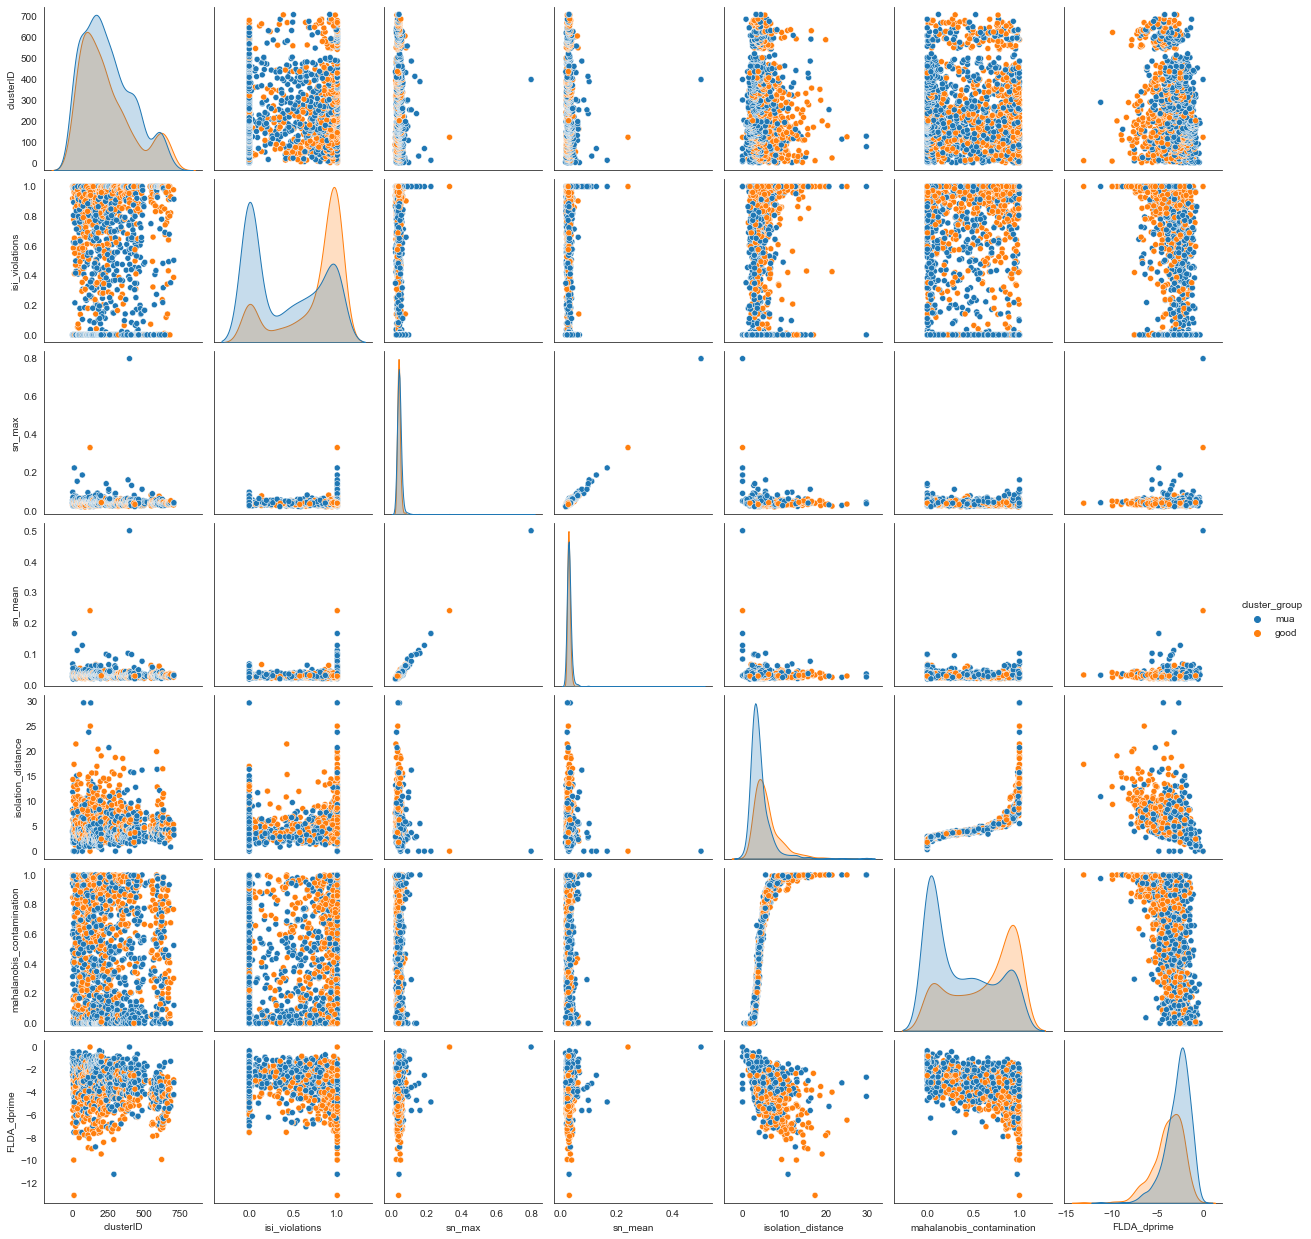

In [624]:
sns.pairplot(df_sorted_,
             diag_kind='kde',markers='o',hue='cluster_group')

### plot a 2D embedding with tSNE

In [11]:
#use combination of metrics that you think best isolate good vs multiunit, you can play around with these. 
# I pretty much only use the linear discriminant analysis to determine what I will consider 'good'
# you would ideally see some seperation in the LDA, in which you would pick a bin (threshold for good) and take all good and multi units to the right of that bin

#metrics = df_sorted[['isi_violations',
                                    #'sn_max',
                                    #'sn_mean',
                                    #'isolation_distance',
                                    #'mahalanobis_contamination',
                                    #'FLDA_dprime']].to_numpy()
metrics = df_sorted[['isi_violations',
                                    'mahalanobis_contamination'
                                    ]].to_numpy()



metrics = np.nan_to_num(metrics)

# look at cluster quality

Text(0.5, 1.0, 'learning rate: 150   perplexity: 50')

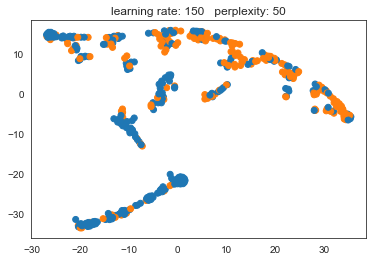

In [12]:
X_tsne = TSNE(learning_rate=80,perplexity=20).fit_transform(metrics)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=np.array(df_sorted.color))
plt.gca().set_title('learning rate: '+str(150)+'   perplexity: '+str(50))

Text(0.5, 1.0, 'k=3')

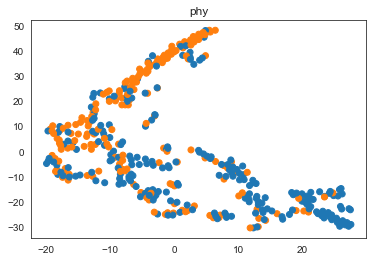

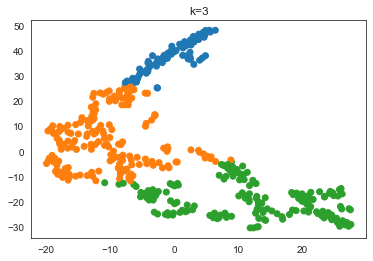

In [79]:
kn=3
km = kmeans2(metrics,
        kn, iter=300, thresh=5e-6,minit='random')
c2 = np.array([sns.color_palette()[k] for k in km[1]])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=np.array(dft_sorted.color))
plt.gca().set_title('phy')
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=c2)
plt.gca().set_title('k='+str(kn))

In [13]:
labels = np.zeros(np.shape(df_sorted)[0])
labels[np.array(df_sorted.cluster_group)=='good']=1

[0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1.

Text(0.5, 1.0, 'LDA projection of all quality metrics, based on phy labels')

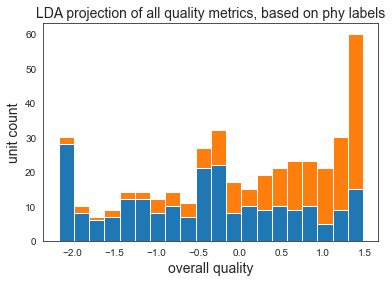

In [16]:
#changed to dft_sorted
labels = np.zeros(np.shape(df_sorted)[0])
labels[np.array(df_sorted.cluster_group)=='good']=1
linear_quality = sq.project_linear_quality(metrics,labels)
lda_multi = linear_quality[labels==0]
lda_good = linear_quality[labels==1]
data = [lda_multi.flatten(), lda_good.flatten()]
d=plt.hist(data,bins=20,stacked=True)
plt.xlabel('overall quality',size=14);plt.ylabel('unit count',size=14);plt.title('LDA projection of all quality metrics, based on phy labels',size=14)

# messing around with quality metrics / comparing mua and good unit characteristics 

In [17]:
df_sorted['linear_qual'] = linear_quality

In [20]:
df_2 = df_sorted[df_sorted.linear_qual>.5]

In [140]:
#add unit characteristics from df to unit metrics dataframe, df_sorted

wav = df.waveform_class
rate = df.overall_rate
ypos = df.ypos
df_sorted['waveform_class'] = wav
df_sorted['overall_rate'] = rate
df_sorted['ypos'] = ypos


Text(0.5, 0, 'firing rate')

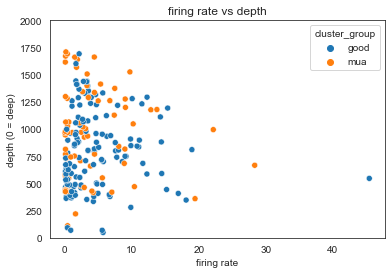

In [119]:
sns.scatterplot(x = df_.overall_rate,y = df_.ypos, hue = df_.cluster_group
           )
plt.title('firing rate vs depth')
plt.ylabel('depth (0 = deep)')
plt.ylim(0,2000)
plt.xlabel('firing rate')

Text(0.5, 0, 'linear quality')

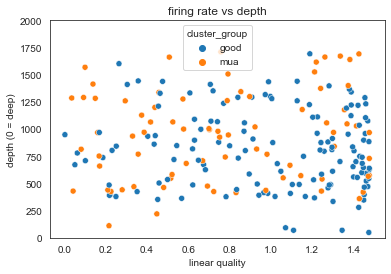

In [121]:
sns.scatterplot(x = df_.linear_qual,y = df_.ypos, hue = df_.cluster_group
           )
plt.title('firing rate vs depth')
plt.ylabel('depth (0 = deep)')
plt.ylim(0,2000)
plt.xlabel('linear quality')

Text(0.5, 0, 'firing rate')

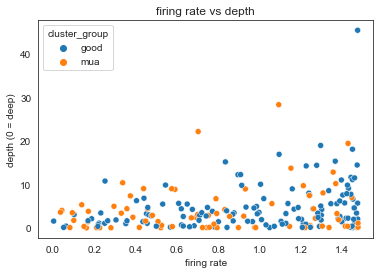

In [123]:
sns.scatterplot(x = df_.linear_qual,y = df_.overall_rate, hue = df_.cluster_group
           )
plt.title('firing rate vs depth')
plt.ylabel('depth (0 = deep)')
plt.xlabel('firing rate')

In [154]:
df_compare['qual'] = a

In [4]:
sns.jointplot(data=df_sorted, x="linear_qual", y="ypos", hue="cluster_group")
plt.ytitle('depth')

NameError: name 'df_sorted' is not defined

(8.0, 1.0)

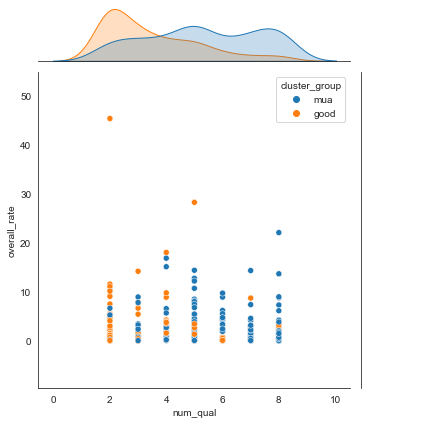

In [183]:
sns.jointplot(data=df_sorted, x="num_qual", y="overall_rate", hue="cluster_group")
plt.xlim(8,1)

(8.0, 1.0)

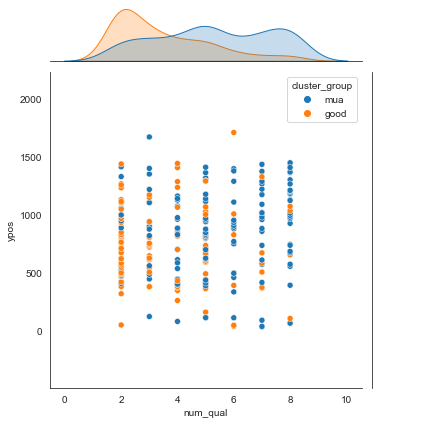

In [184]:
sns.jointplot(data=df_sorted, x="num_qual", y="ypos", hue="cluster_group")
plt.y
plt.xlim(8,1)

In [178]:
start = 1.0
step = 0.5
a = []

for i in df_sorted.linear_qual:
    if i>1.5: # i > 1.5
        a.append(1) 
    if i>1 and i<1.5: # 1 < i < 1.5
        a.append(2)
    if i > 0.5 and i < 1:
        a.append(3)
    if i > 0 and i < 0.5:
        a.append(4)
    if i < 0 and i > -0.5:
        a.append(5)
    if i < -0.5 and i > -1:
        a.append(6)
    if i <-1 and i > -1.5:
        a.append(7)
    if i <-1.5:
        a.append(8)
        
        

In [179]:
df_sorted['num_qual'] = a

Text(0.5, 0, 'firing rate')

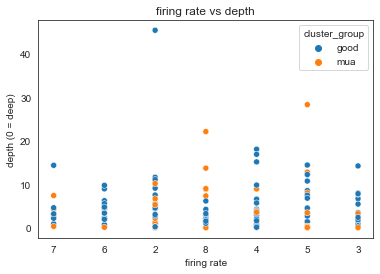

In [167]:
sns.scatterplot(x = df_sorted.qual,y = df_sorted.overall_rate, hue = df_.cluster_group
           )
plt.title('firing rate vs depth')
plt.ylabel('depth (0 = deep)')

plt.xlabel('firing rate')

Text(0.5, 0, 'amplitude')

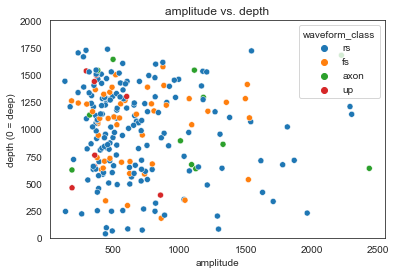

In [1090]:
sns.scatterplot(x = df_gs.amp,y = df_gs.ypos, hue = df_gs.waveform_class
           )
plt.title('amplitude vs. depth')
plt.ylim(0,2000)
plt.ylabel('depth (0 = deep)')
plt.xlabel('amplitude')

In [146]:
df_compare = df_sorted.drop('mouse',axis=1)

<AxesSubplot:xlabel='waveform_class', ylabel='ypos'>

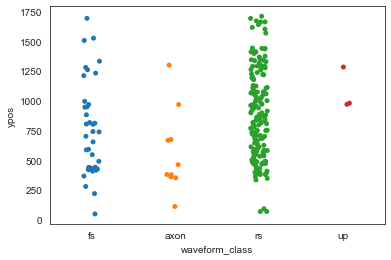

In [79]:
sns.stripplot(data=df_,x='waveform_class',y='ypos')

In [152]:
df_compare = df_compare.drop('sn_mean',axis=1)

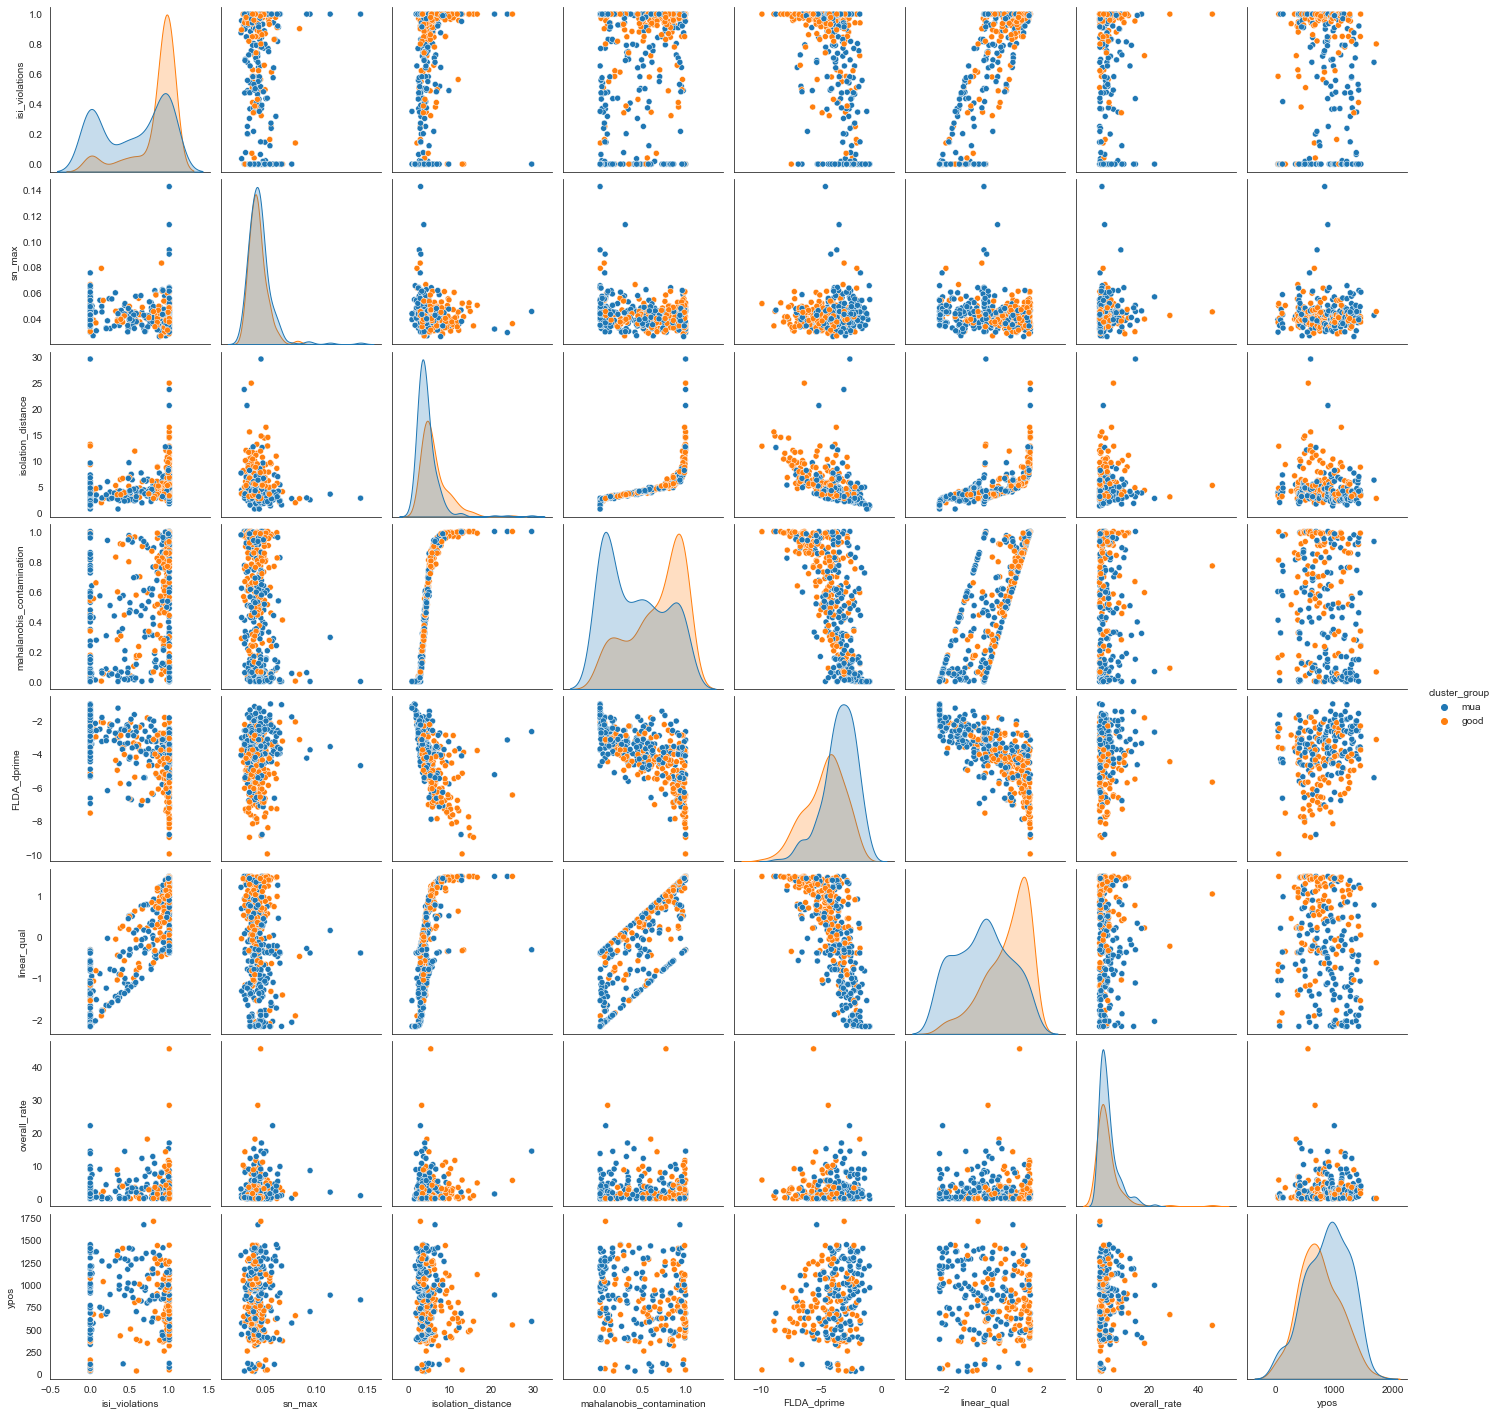

In [153]:
sns.pairplot(df_compare,
             diag_kind='kde',markers='o',hue='cluster_group')

In [560]:
df_amp['mouse'] = 47

In [522]:
df_amps = df_amp

In [605]:
df_sorted['mouse'] = 50

In [556]:
df_sorteds = pd.concat([df_sorted,df_sorteds])

In [521]:
dfs = pd.concat([df,dfs])

# Save sorted and good quality metrics dataframes

In [601]:
df_sorted['mouse'] = 49

In [611]:
df_sorted.to_json(r'C:\Users\16623\Desktop\kim_analysis\Experiments\sorting_quality/df_sorted_all.json')

In [82]:
# read

In [8]:
data_path = r'/Users/16623/Desktop/kim_analysis/Experiments/sorting_quality/df_sorted49.json'
df_sorted = pd.read_json(data_path)

In [9]:
data_path = r'/Users/16623/Desktop/kim_analysis/df49.json'
df = pd.read_json(data_path)

In [10]:
data_path = r'/Users/16623/Desktop/kim_analysis/df49_mua.json'
df_mua = pd.read_json(data_path)


## plot individual unit summaries, showing data and metrics

no sampling rate specified, using default of 30kHz


C:\Users\16623\Anaconda3\envs\KgWelleLab\lib\site-packages\dlab\sorting_quality.py:167: RuntimeWarning: invalid value encountered in true_divide
  weights = weights/np.max(weights)


['22', '21', '27']


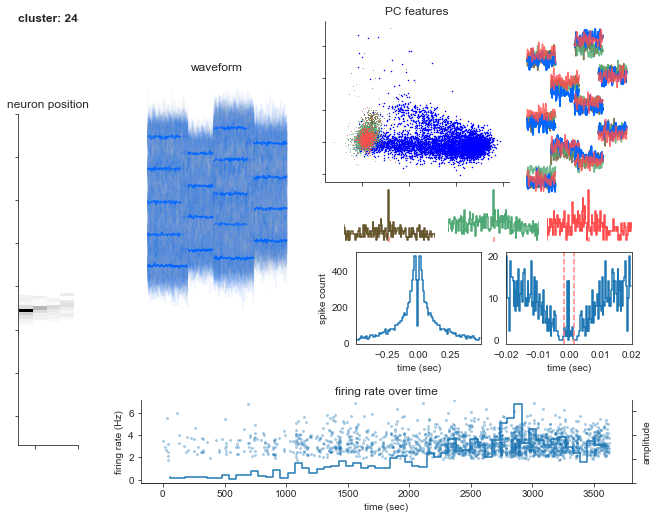

In [35]:
df_good = df[df.cluster_group=='good']
d=sq.neuron_fig(clusterID=str(df_good.clusterID[df.isolation_distance == df_good.isolation_distance.max()].values[0]),
                df=df,
                sortpath=directory,
               filename='continuous.dat')